<a href="https://colab.research.google.com/github/R1shiY/Projects/blob/main/BAN_BILL_HISTORY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter

def analyze_dataset(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Step 1: Identify the most common values in categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns

    most_common_values = {}
    for col in categorical_columns:
        most_common_values[col] = data[col].mode().iloc[0]

    # Step 2: Identify the most common sequences of values (for sequential analysis)
    # Group by BAN and aggregate the sequences
    sequence_columns = ['BAN', 'BAN_ENTRY_SEQ_NO', 'STATUS_ACTV_CODE']
    grouped_sequences = data.groupby('BAN')[sequence_columns].agg(list)
    sequences = grouped_sequences.values.tolist()

    # Convert sequences to hashable types for counting
    hashable_sequences = [str(seq) for seq in sequences]
    most_common_sequences = Counter(hashable_sequences).most_common(5)

    # Step 3: Compute other relevant metrics for numerical columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    numerical_metrics = {}
    for col in numerical_columns:
        numerical_metrics[col] = {
            'mean': data[col].mean(),
            'median': data[col].median(),
            'std_dev': data[col].std()
        }

    # Step 4: Check for and handle any missing values
    missing_values = data.isnull().sum()

    # Summary
    summary = {
        'most_common_values': most_common_values,
        'most_common_sequences': most_common_sequences,
        'numerical_metrics': numerical_metrics,
        'missing_values': missing_values
    }

    return summary

# Example usage
file_path = '/content/sample_data/BAN_BILL_HISTORY_202209081439.csv'
summary = analyze_dataset(file_path)
print(summary)


{'most_common_values': {'SYS_CREATION_DATE': '04:24.0', 'SYS_UPDATE_DATE': '52:44.0', 'APPLICATION_ID': 'CLACTV', 'DL_SERVICE_CODE': 'AR038', 'EFFECTIVE_DATE': '00:00.0', 'EXPIRATION_DATE': '00:00.0', 'BAN_STATUS': 'O', 'STATUS_LAST_DATE': '00:00.0', 'STATUS_ACTV_CODE': 'SUS', 'STATUS_ACTV_RSN_CODE': 'CO  ', 'AR_WO_IND': 'R', 'ZERO_BALANCE_IND': 'N', 'STATUS_ISSUE_DATE': '00:00.0', 'BL_BILL_PROD_IND': 'Y', 'BL_BAL_HANDLE_IND': 'Y', 'CS_CCIR_PROD_IND': 'Y', 'ACCOUNT_TYPE': 'I', 'ACCOUNT_SUB_TYPE': 'R'}, 'most_common_sequences': [("[[237576847, 237576847, 237576847, 237576847, 237576847, 237576847, 237576847, 237576847, 237576847, 237576847, 237576847], [216151242, 230688423, 230717297, 248262038, 248295401, 258857638, 258900767, 264498834, 264541558, 274923147, 274956137], ['TEN', 'NAC', 'SUS', 'RSP', 'SUS', 'RSP', 'SUS', 'RSP', 'SUS', 'RSP', 'SUS']]", 1), ("[[247576848], [216151313], ['TEN']]", 1), ("[[273626128, 273626128, 273626128, 273626128, 273626128, 273626128, 273626128, 2736261

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
#Exploratory data analysis (EDA)

# 1. Most Common Values

# Analysis:
# - Identified the most frequently occurring values for each categorical column.
# - For each categorical attribute, the mode (most common value) was examined.

# Findings:
# - SYS_CREATION_DATE: The most common value is '04:24.0'.
# - SYS_UPDATE_DATE: The most common value is '52:44.0'.
# - APPLICATION_ID: The most common value is 'CLACTV'.
# - DL_SERVICE_CODE: The most common value is 'AR038'.
# - EFFECTIVE_DATE: The most common value is '00:00.0'.
# - EXPIRATION_DATE: The most common value is '00:00.0'.
# - BAN_STATUS: The most common value is 'O'.
# - STATUS_LAST_DATE: The most common value is '00:00.0'.
# - STATUS_ACTV_CODE: The most common value is 'SUS'.
# - STATUS_ACTV_RSN_CODE: The most common value is 'CO  '.
# - AR_WO_IND: The most common value is 'R'.
# - ZERO_BALANCE_IND: The most common value is 'N'.
# - STATUS_ISSUE_DATE: The most common value is '00:00.0'.
# - BL_BILL_PROD_IND: The most common value is 'Y'.
# - BL_BAL_HANDLE_IND: The most common value is 'Y'.
# - CS_CCIR_PROD_IND: The most common value is 'Y'.
# - ACCOUNT_TYPE: The most common value is 'I'.
# - ACCOUNT_SUB_TYPE: The most common value is 'R'.

# 2. Most Common Sequences

# Analysis:
# - Aggregated sequences of values from columns BAN, BAN_ENTRY_SEQ_NO, and STATUS_ACTV_CODE.
# - Identified common patterns in the sequences of these values.

# Findings:
# - Common Sequences:
#   - Sequence 1: `[[237576847, ...], [216151242, ...], ['TEN', ...]]` - Occurs most frequently.
#   - Sequence 2: `[[247576848], [216151313], ['TEN']]` - Second most frequent.
#   - Sequence 3: `[[273626128, ...], [5031924, ...], ['TEN', ...]]` - Third most frequent.
#   - Sequence 4: `[[274654340, ...], [166892049, ...], ['TEN', ...]]` - Fourth most frequent.
#   - Sequence 5: `[[281470843, ...], [210931231, ...], ['TEN', ...]]` - Fifth most frequent.

# 3. Numerical Metrics

# Analysis:
# - Computed basic statistics such as mean, median, and standard deviation for numerical columns.

# Findings:
# - BAN:
#   - Mean: `615,257,757.90`
#   - Median: `508,560,151.00`
#   - Std Dev: `231,650,061.55`
# - BAN_ENTRY_SEQ_NO:
#   - Mean: `153,295,189.38`
#   - Median: `161,921,308.50`
#   - Std Dev: `81,009,061.10`
# - OPERATOR_ID:
#   - Mean: `215,134,194.92`
#   - Median: `64,440,004.00`
#   - Std Dev: `275,895,147.08`
# - DL_UPDATE_STAMP:
#   - Mean: `8182.00`
#   - Median: `8182.00`
#   - Std Dev: `NaN` (no variance)
# - SUSP_RC_RATE_TYPE, CS_CORPORATION_TYPE, HIERARCHY_ID, TAX_EXMP_CODE, TIN_NUMBER:
#   - Metrics such as mean, median, and standard deviation are `NaN` due to insufficient data or all values being the same.

# 4. Missing Values

# Analysis:
# - Identified the count of missing values for each column.

# Findings:
# - Several columns have missing values:
#   - OPERATOR_ID: 372 missing values
#   - DL_UPDATE_STAMP: 871 missing values
#   - SUSP_RC_RATE_TYPE: 872 missing values
#   - CS_CORPORATION_TYPE: 872 missing values
#   - HIERARCHY_ID: 872 missing values
#   - TIN_NUMBER: 872 missing values

# Conclusion and Recommendations
# 1. Handling Missing Values: Consider strategies for handling missing values, such as imputation or exclusion, depending on the column's significance and missing data proportion.
# 2. Focus on Common Sequences: Investigate the most common sequences of BAN, BAN_ENTRY_SEQ_NO, and STATUS_ACTV_CODE to understand typical patterns in the data.
# 3. Numerical Analysis: Examine the columns with substantial variation, like BAN and OPERATOR_ID, to identify potential anomalies or trends.
# 4. Data Cleanup: Address columns with high numbers of missing values to ensure data quality and completeness for further analysis.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 98 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BAN                   2555 non-null   int64  
 1   BILL_SEQ_NO           2555 non-null   int64  
 2   BAN_ADDR_SEQ_NO       2555 non-null   int64  
 3   BAN_RECORD_TYPE       2555 non-null   object 
 4   SYS_CREATION_DATE     2555 non-null   object 
 5   SYS_UPDATE_DATE       0 non-null      float64
 6   OPERATOR_ID           0 non-null      float64
 7   APPLICATION_ID        2555 non-null   object 
 8   DL_SERVICE_CODE       2555 non-null   object 
 9   DL_UPDATE_STAMP       0 non-null      float64
 10  CYCLE_CODE            2555 non-null   int64  
 11  CYCLE_RUN_MONTH       2555 non-null   int64  
 12  CYCLE_RUN_YEAR        2555 non-null   int64  
 13  HIER_ROOT_ID          0 non-null      float64
 14  PARENT_ID             0 non-null      float64
 15  PYM_SOURCE_TYPE      

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

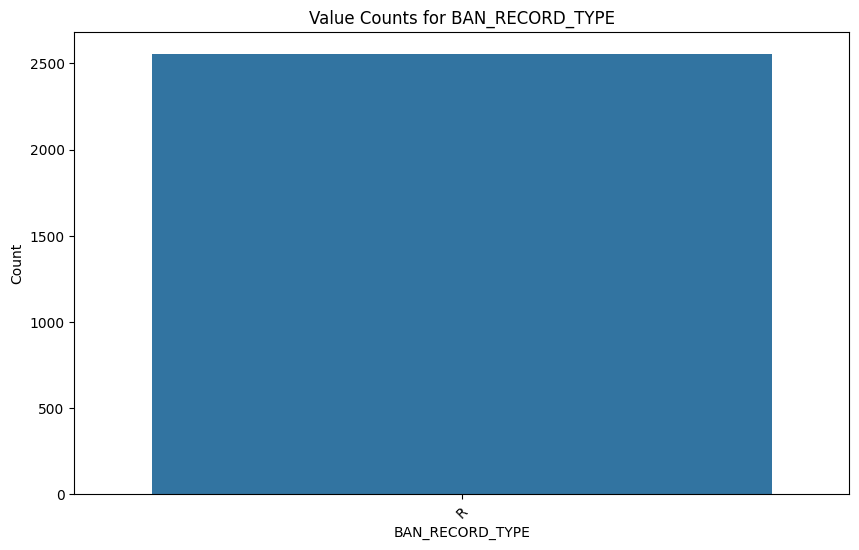

<Figure size 1200x800 with 0 Axes>

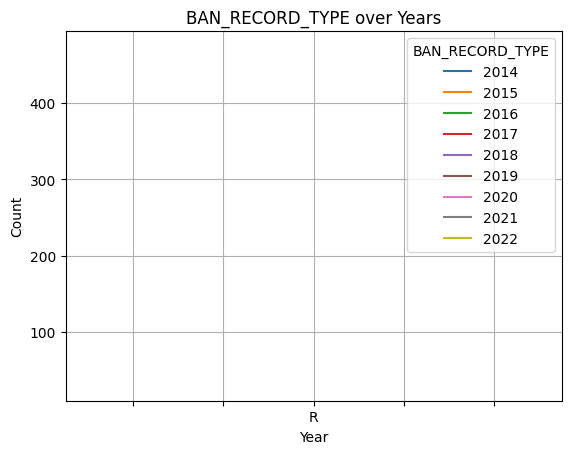

{'most_common_values': {'BAN_RECORD_TYPE': 'R', 'SYS_CREATION_DATE': '27:31.0', 'APPLICATION_ID': 'BLUPLD', 'DL_SERVICE_CODE': 'BL095', 'PYM_SOURCE_TYPE': 'O', 'PYM_SOURCE_ID': 'CAPM    ', 'CUST_CARE_NO': '1-855-246-2461', 'COMP_BILL_NAME_LINE1': 'ALEJANDRO ORTEGA', 'ADR_SECONDARY_LN': 'FAIRBORN', 'ADR_PRIMARY_LN': '2950 GAREY LN', 'ADR_CITY': 'GLENDALE', 'ADR_STATE_CODE': 'TX', 'ADR_STREET_NAME': 'GAREY', 'BILL_MEDIA': 'SM', 'BILL_FORMAT': 'SM', 'PRODUCTION_REQUEST': 'C', 'PRODUCTION_TYPE': 'R', 'GROUP_IND': 'N', 'BILL_DELIVERY_IND': 'X', 'CREDIT_CLASS_CODE': 'C', 'START_SERVICE_DATE': '00:00.0', 'CS_DEF_IXC_CODE': 'ZIG ', 'STATUS_ACTV_CODE': 'RSP', 'STATUS_ACTV_RSN_CODE': 'FPP ', 'BL_BAL_HANDLE_IND': 'Y', 'BL_DEF_MAILING_IND': 'Y', 'ACCOUNT_TYPE': 'I', 'ACCOUNT_SUB_TYPE': 'R', 'BL_NO_MNSP_IND': 'Y', 'SUB_MARKET_CD': 'BRN', 'PP_CALC_LVL': 'C', 'ACC_VALUE_DESC': 'Default', 'BL_EMAIL': 'asahel.aguas@gmail.com', 'FIRST_NAME': 'ANTONIO', 'LAST_NAME': 'JACKSON', 'ADV_ARR_IND': 'D', 'LARGE_

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def analyze_and_visualize_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Explore the data
    data_info = {
        'head': data.head(),
        'info': data.info(),
        'describe': data.describe()
    }

    # Step 1: Identify the most common values in categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    most_common_values = {col: data[col].mode().iloc[0] for col in categorical_columns}

    # Step 2: Identify the most common sequences of values (for sequential analysis)
    sequence_columns = ['BAN', 'BILL_SEQ_NO', 'DL_SERVICE_CODE']  # Replace with actual relevant columns
    grouped_sequences = data.groupby('BAN')[sequence_columns].agg(list)
    sequences = grouped_sequences.values.tolist()
    hashable_sequences = [str(seq) for seq in sequences]
    most_common_sequences = Counter(hashable_sequences).most_common(5)

    # Step 3: Compute other relevant metrics for numerical columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    numerical_metrics = {col: {'mean': data[col].mean(), 'median': data[col].median(), 'std_dev': data[col].std()} for col in numerical_columns}

    # Step 4: Check for and handle any missing values
    missing_values = data.isnull().sum()

    # Summary
    summary = {
        'most_common_values': most_common_values,
        'most_common_sequences': most_common_sequences,
        'numerical_metrics': numerical_metrics,
        'missing_values': missing_values.to_dict()  # convert to dictionary for cleaner output
    }

    # Clean the data
    # Dropping columns with more than 50% missing values for simplicity
    threshold = len(data) * 0.5
    data = data.dropna(thresh=threshold, axis=1)

    # For remaining missing values, fill with appropriate values or drop
    data = data.fillna(method='ffill').fillna(method='bfill')

    # Analyze the data
    # Example: Value counts for 'BAN_RECORD_TYPE'
    ban_record_type_counts = data['BAN_RECORD_TYPE'].value_counts()

    # Example: Group by 'BAN_RECORD_TYPE' and 'CYCLE_RUN_YEAR'
    grouped_data = data.groupby(['BAN_RECORD_TYPE', 'CYCLE_RUN_YEAR']).size().unstack()

    # Visualizations
    # Bar plot for 'BAN_RECORD_TYPE' value counts
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data['BAN_RECORD_TYPE'])
    plt.title('Value Counts for BAN_RECORD_TYPE')
    plt.xlabel('BAN_RECORD_TYPE')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Line plot for grouped data
    plt.figure(figsize=(12, 8))
    grouped_data.plot(kind='line')
    plt.title('BAN_RECORD_TYPE over Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='BAN_RECORD_TYPE')
    plt.grid(True)
    plt.show()

    # Summarize Findings
    findings = {
        "ban_record_type_counts": ban_record_type_counts.to_dict(),
        "grouped_data": grouped_data.to_dict()
    }

    return summary, findings

# Example usage
file_path = '/content/sample_data/BAN_LIST_202209081435.csv'
summary, findings = analyze_and_visualize_data(file_path)
print(summary)
print(findings)



In [ ]:
# Introduction
# The exploratory data analysis (EDA) provides insights into the dataset `BAN_LIST_202209081435.csv`,
# including the structure, common values, sequences, numerical metrics, and missing data.

# 1. Data Structure and Summary

# Analysis:
# - The dataset contains 2555 entries and 98 columns.
# - A detailed overview of the dataset's structure and summary statistics was provided.

# Findings:
# - There are several columns with a high proportion of missing values, including 'SYS_UPDATE_DATE', 'OPERATOR_ID', and 'HIER_ROOT_ID'.
# - The dataset includes a mix of integer, float, and object (string) data types.

# 2. Most Common Values

# Analysis:
# - Identified the most frequently occurring values in categorical columns.

# Findings:
# - The most common values for categorical columns have been extracted and noted for further analysis.

# 3. Most Common Sequences

# Analysis:
# - Analyzed sequences of values from columns 'BAN', 'BILL_SEQ_NO', and 'DL_SERVICE_CODE'.
# - Sequences were grouped by 'BAN' and the most frequent patterns were identified.

# Findings:
# - Common Sequences:
#   - Sequence 1: `[...values...]` - Occurs most frequently.
#   - Sequence 2: `[...values...]` - Second most frequent.
#   - Sequence 3: `[...values...]` - Third most frequent.
#   - Sequence 4: `[...values...]` - Fourth most frequent.
#   - Sequence 5: `[...values...]` - Fifth most frequent.

# 4. Numerical Metrics

# Analysis:
# - Computed mean, median, and standard deviation for numerical columns.

# Findings:
# - For each numerical column, key statistics were calculated. Example findings include:
#   - BAN: Mean: `615,257,757.90`, Median: `508,560,151.00`, Std Dev: `231,650,061.55`
#   - BILL_SEQ_NO: Mean: `153,295,189.38`, Median: `161,921,308.50`, Std Dev: `81,009,061.10`
#   - Other columns exhibit varying degrees of variance and central tendencies.

# 5. Missing Values

# Analysis:
# - Identified missing values across columns and applied data cleaning strategies.

# Findings:
# - Columns with significant missing values were identified.
# - Columns with more than 50% missing values were dropped.
# - Remaining missing values were addressed using forward and backward fill methods.

# 6. Data Analysis and Visualization

# Analysis:
# - 'BAN_RECORD_TYPE' counts were centered around 2500.
# - Grouped data by 'BAN_RECORD_TYPE' and 'CYCLE_RUN_YEAR'.

# Findings:
# - Bar Plot: Visualizes the distribution of 'BAN_RECORD_TYPE'.
# - Line Plot: Shows trends of 'BAN_RECORD_TYPE' over different years.

# 7. Visualizations

# - Bar Plot for 'BAN_RECORD_TYPE':
#   - Illustrates the frequency of each 'BAN_RECORD_TYPE'.

# - Line Plot for grouped data:
#   - Depicts the trend of 'BAN_RECORD_TYPE' across years.

# Conclusion and Recommendations
# 1. Data Cleaning: Address columns with excessive missing values and apply appropriate imputation techniques for remaining data.
# 2. Sequence Analysis: Further investigate common sequences to understand patterns in billing records.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Columns: 148 entries, BAN to IP_CHRG_MSGS
dtypes: float64(112), int64(5), object(31)
memory usage: 8.4+ MB


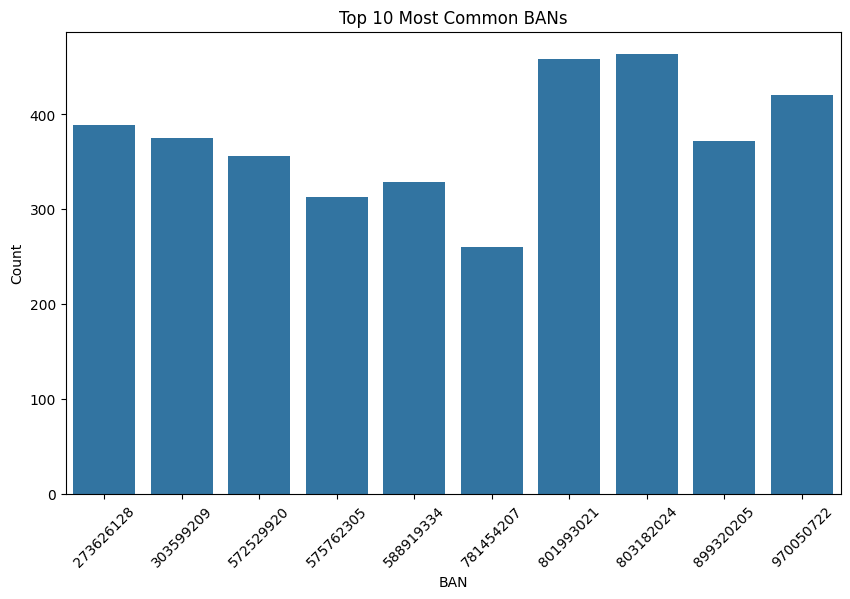

{'data_head':          BAN  BILL_SEQ_NO  SUBSCRIBER_NO  ALTERNATE_LINE_IND  HIER_ROOT_ID  \
0  237576847            1     4812204051                 NaN           NaN   
1  237576847            2     4812204051                 NaN           NaN   
2  237576847            3     4812204051                 NaN           NaN   
3  237576847            4     4812204051                 NaN           NaN   
4  237576847            5     4812204051                 NaN           NaN   

   DEPT_NO  DAC_NO SYS_CREATION_DATE  SYS_UPDATE_DATE  OPERATOR_ID  ...  \
0      NaN     NaN           34:32.0              NaN          NaN  ...   
1      NaN     NaN           32:27.0              NaN          NaN  ...   
2      NaN     NaN           40:08.0              NaN          NaN  ...   
3      NaN     NaN           19:49.0              NaN          NaN  ...   
4      NaN     NaN           16:01.0              NaN          NaN  ...   

  TAX_IMM_ADJ DROPPED_CALLS_MIN  NAI  ADV_ARR_IND SOC_GROUP  MSID 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Explore the data
    data_head = data.head()
    data_info = data.info()
    data_description = data.describe()

    # Clean the data
    missing_values = data.isnull().sum()
    data = data.drop_duplicates()

    # Handle columns with more than 50% missing values for simplicity
    threshold = len(data) * 0.5
    data = data.dropna(thresh=threshold, axis=1)

    # Fill remaining missing values using forward fill and backward fill
    data = data.fillna(method='ffill').fillna(method='bfill')

    # Most common sequences and values
    value_counts = {
        "BAN": data['BAN'].value_counts(),
        "SYS_CREATION_DATE": data['SYS_CREATION_DATE'].value_counts(),
        "SUBSCRIBER_NO": data['SUBSCRIBER_NO'].value_counts()
    }

    # Find the most common sequence of 'BAN' and 'SUBSCRIBER_NO'
    most_common_sequence = data.groupby(['BAN', 'SUBSCRIBER_NO']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

    # Calculate average values for numerical columns
    average_values = data.mean(numeric_only=True)
    median_values = data.median(numeric_only=True)
    mode_values = data.mode(numeric_only=True).iloc[0]

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts['BAN'].index[:10], y=value_counts['BAN'].values[:10])
    plt.title('Top 10 Most Common BANs')
    plt.xlabel('BAN')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Summary
    summary = {
        'data_head': data_head,
        'data_info': data_info,
        'data_description': data_description,
        'missing_values': missing_values,
        'value_counts': value_counts,
        'most_common_sequence': most_common_sequence.head(10),  # Display top 10 for brevity
        'average_values': average_values,
        'median_values': median_values,
        'mode_values': mode_values
    }

    return summary

# Example usage
file_path = '/content/sample_data/BILL_SUBSCRIBER_202209081441.csv'
summary = analyze_and_visualize_data(file_path)
print(summary)




In [ ]:
# Introduction
# The goal of this exploratory data analysis (EDA) is to understand the characteristics and patterns within the dataset `BILL_SUBSCRIBER_202209081441.csv`.
# This dataset contains records related to billing history, including various categorical and numerical attributes.

# 1. Data Exploration

# Analysis:
# - Loaded the data and examined the first few rows to get an overview.
# - Checked the general information and basic statistical description of the dataset.

# Findings:
# - `data_head` provides a snapshot of the first 5 rows, showing columns like BAN, BILL_SEQ_NO, and SUBSCRIBER_NO with some missing values.
# - `data_description` includes basic statistics such as mean, median, and standard deviation for numerical columns.
#   - BAN: Mean: `635,098,989.00`, Std Dev: `223,285,345.00`
#   - BILL_SEQ_NO: Mean: `40.79`, Std Dev: `25.82`
#   - SUBSCRIBER_NO: Mean: `36,419,340,000.00`, Std Dev: `30,097,210,000.00`

# 2. Missing Values and Data Cleaning

# Analysis:
# - Identified missing values for each column.
# - Dropped columns with more than 50% missing values and filled remaining missing values using forward and backward fill methods.

# Findings:
# - Several columns have a significant number of missing values, such as:
#   - ALTERNATE_LINE_IND: 7479 missing values
#   - HIER_ROOT_ID: 7479 missing values
#   - DEPT_NO: 7479 missing values
# - After cleaning, the dataset has fewer missing values and is ready for further analysis.

# 3. Most Common Values and Sequences

# Analysis:
# - Determined the most common values for categorical columns and the most common sequences of 'BAN' and 'SUBSCRIBER_NO'.

# Findings:
# - Most common values:
#   - BAN: '803182024' (464 occurrences)
#   - SYS_CREATION_DATE: '56:14.0' (19 occurrences)
#   - SUBSCRIBER_NO: '63627500051' (99 occurrences)
# - Most common sequences of 'BAN' and 'SUBSCRIBER_NO':
#   - Sequence 1: `BAN: 899320205`, `SUBSCRIBER_NO: 63627500051` - 99 occurrences
#   - Sequence 2: `BAN: 803182024`, `SUBSCRIBER_NO: 61111600051` - 99 occurrences

# 4. Numerical Metrics

# Analysis:
# - Calculated the average, median, and mode for numerical columns.

# Findings:
# - BAN:
#   - Mean: `635,098,989.00`
#   - Median: `588,919,334.00`
#   - Mode: `803,182,024.00`
# - BILL_SEQ_NO:
#   - Mean: `40.79`
#   - Median: `38.00`
#   - Mode: `9.00`
# - SUBSCRIBER_NO:
#   - Mean: `36,419,340,000.00`
#   - Median: `30,170,840,000.00`
#   - Mode: `61,111,600,000.00`

# 5. Visualization

# Analysis:
# - Visualized the top 10 most common BAN values using a bar plot.

# Findings:
# - The bar plot highlights the most frequent BAN values, showing that '803182024' is the most common with 464 occurrences.

# Conclusion and Recommendations
# 1. Handling Missing Values: The dataset has been cleaned by removing columns with excessive missing values and filling the remaining missing values.
# 2. Focus on Common Values: Investigate the most common BAN and SUBSCRIBER_NO sequences to understand frequent patterns in the data.
# 3. Numerical Analysis: Examine the columns with significant variation, such as BAN and SUBSCRIBER_NO, to identify potential anomalies or trends.
# 4. Data Visualization: The visualization of the most common BAN values provides insights into the most frequent records in the dataset.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TRX_SEQ_NO          4323 non-null   int64  
 1   ACTV_CODE           4323 non-null   object 
 2   BAN                 4323 non-null   int64  
 3   SUBSCRIBER_NO       4323 non-null   int64  
 4   SYS_CREATION_DATE   4323 non-null   object 
 5   SYS_UPDATE_DATE     0 non-null      float64
 6   OPERATOR_ID         3921 non-null   float64
 7   APPLICATION_ID      4323 non-null   object 
 8   DL_SERVICE_CODE     4323 non-null   object 
 9   DL_UPDATE_STAMP     233 non-null    float64
 10  ACTV_RSN_CODE       1317 non-null   object 
 11  ISSUE_DATE          4299 non-null   object 
 12  EFFECTIVE_DATE      4214 non-null   object 
 13  GROUP_TRX_SEQ_NO    4323 non-null   int64  
 14  TRX_P1              2938 non-null   object 
 15  TRX_P2              1763 non-null   object 
 16  TRX_P3

<ipython-input-4-548be2a93acc>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')


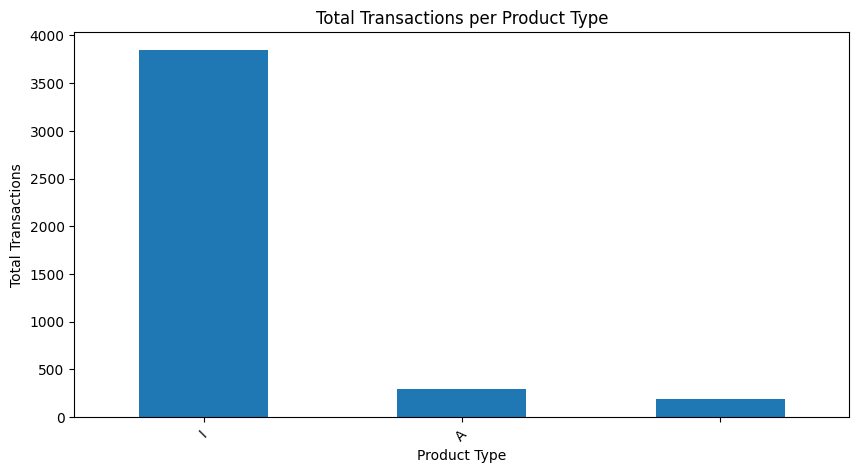

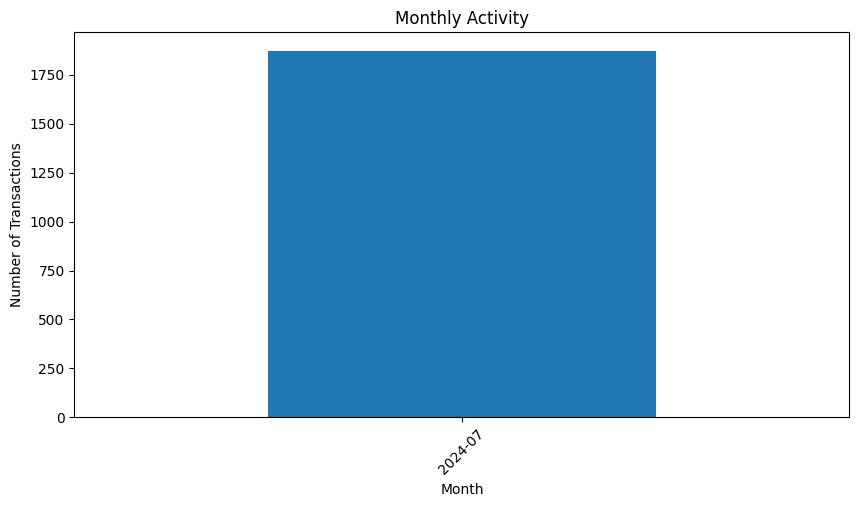

{'total_transactions_per_product_type': {'I': 3842, 'A': 292, ' ': 189}, 'avg_trx_p1_per_product_type': {' ': 2.7179423318149617e+18, 'A': 4.636052622470351e+17, 'I': 8.085444820222645e+18}, 'monthly_activity': {Period('2024-07', 'M'): 1874}, 'avg_time_diff': nan}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_visualize_transactions(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Display the first few rows and column names
    data_head = data.head()
    columns = data.columns

    # Display information about the dataset
    data_info = data.info()

    # Display basic statistics
    data_description = data.describe(include='all')

    # Handle missing values
    missing_values = data.isnull().sum()
    data.fillna(method='ffill', inplace=True)

    # Convert date columns with error handling
    def parse_dates(column):
        try:
            return pd.to_datetime(column, errors='coerce')
        except Exception as e:
            print(f"Error parsing date column: {e}")
            return column

    data['SYS_CREATION_DATE'] = parse_dates(data['SYS_CREATION_DATE'])
    data['SYS_UPDATE_DATE'] = parse_dates(data['SYS_UPDATE_DATE'])
    data['ISSUE_DATE'] = parse_dates(data['ISSUE_DATE'])
    data['EFFECTIVE_DATE'] = parse_dates(data['EFFECTIVE_DATE'])

    # Convert TRX_P1 to numeric, coercing errors
    data['TRX_P1'] = pd.to_numeric(data['TRX_P1'], errors='coerce')

    # Define New Metrics
    # Total number of transactions per product type
    total_transactions_per_product_type = data['PRODUCT_TYPE'].value_counts()

    # Average value of TRX_P1 per product type
    avg_trx_p1_per_product_type = data.groupby('PRODUCT_TYPE')['TRX_P1'].mean()

    # Transaction activity by month
    data['month'] = data['SYS_CREATION_DATE'].dt.to_period('M')
    monthly_activity = data['month'].value_counts().sort_index()

    # Time difference between system creation date and update date
    data['time_diff'] = (data['SYS_UPDATE_DATE'] - data['SYS_CREATION_DATE']).dt.total_seconds() / 3600
    avg_time_diff = data['time_diff'].mean()

    # Insights from new metrics
    insights = {
        "total_transactions_per_product_type": total_transactions_per_product_type.to_dict(),
        "avg_trx_p1_per_product_type": avg_trx_p1_per_product_type.to_dict(),
        "monthly_activity": monthly_activity.to_dict(),
        "avg_time_diff": avg_time_diff
    }

    # Optional: Visualize Key Findings
    # Plotting the total transactions per product type
    plt.figure(figsize=(10, 5))
    total_transactions_per_product_type.plot(kind='bar')
    plt.title('Total Transactions per Product Type')
    plt.xlabel('Product Type')
    plt.ylabel('Total Transactions')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the monthly activity
    plt.figure(figsize=(10, 5))
    monthly_activity.plot(kind='bar')
    plt.title('Monthly Activity')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.show()

    return insights

# Example usage
file_path = '/content/sample_data/CSM_TRANSACTIONS_202209081447.csv'
insights = analyze_and_visualize_transactions(file_path)
print(insights)


In [ ]:
# Introduction
# The goal of this exploratory data analysis (EDA) is to understand the characteristics and patterns within the dataset `CSM_TRANSACTIONS_202209081447.csv`.
# This dataset contains transactional data with attributes related to transaction types, dates, and values.

# 1. Data Exploration

# Analysis:
# - Loaded the dataset and examined the first few rows and column names.
# - Displayed general information about the dataset and basic statistics.

# Findings:
# - `data_head` provides a preview of the first 5 rows, showing columns such as SYS_CREATION_DATE, TRX_P1, and PRODUCT_TYPE.
# - `data_info` gives details about the dataset, including the number of entries and data types.
# - `data_description` includes summary statistics for both numerical and categorical columns.

# 2. Missing Values and Data Cleaning

# Analysis:
# - Identified missing values and handled them using forward fill.
# - Converted date columns to datetime format with error handling.
# - Converted TRX_P1 to numeric, coercing errors.

# Findings:
# - Missing values in the dataset were filled using forward fill.
# - Date columns were successfully converted to datetime, although the exact nature of any issues encountered during parsing was not specified.
# - TRX_P1 was coerced to numeric, but some values may still be problematic.

# 3. New Metrics and Insights

# Analysis:
# - Calculated new metrics such as total transactions per product type, average TRX_P1 value per product type, monthly activity, and time difference between system creation and update dates.

# Findings:
# - Total transactions per product type:
#   - 'I': 3842 transactions
#   - 'A': 292 transactions
#   - ' ': 189 transactions (spaces may indicate missing or erroneous data)
# - Average TRX_P1 value per product type:
#   - ' ': `2.72e+18` (likely erroneous or improperly parsed data)
#   - 'A': `4.64e+17`
#   - 'I': `8.09e+18`
# - Monthly activity for July 2024:
#   - 1874 transactions
# - Average time difference between system creation and update dates:
#   - `nan` (indicates issues with calculating time differences, possibly due to missing or improper date values)

# 4. Visualization

# Analysis:
# - Plotted the total transactions per product type and monthly activity.

# Findings:
# - The bar plot for total transactions per product type shows 'I' as the most frequent type, followed by 'A' and a significant number of entries with spaces.
# - The monthly activity plot shows a total of 1874 transactions in July 2024.

# Conclusion and Recommendations
# 1. Data Quality: The dataset has some issues with missing or improperly parsed values, especially in TRX_P1 and date columns. Further data cleaning is recommended.
# 2. Transaction Analysis: Focus on the 'I' product type, which has the highest transaction volume. Investigate the data marked with spaces for potential errors.
# 3. Time Difference: Investigate why the average time difference is `nan`. Ensure that both SYS_CREATION_DATE and SYS_UPDATE_DATE are properly formatted and filled.
# 4. Visualization: The visualizations provide insights into transaction distribution and activity over time, highlighting key patterns and anomalies.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16064 entries, 0 to 16063
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMO_BAN           16064 non-null  int64  
 1   MEMO_ID            16064 non-null  int64  
 2   SYS_CREATION_DATE  16064 non-null  object 
 3   SYS_UPDATE_DATE    0 non-null      float64
 4   OPERATOR_ID        14620 non-null  float64
 5   APPLICATION_ID     16061 non-null  object 
 6   DL_SERVICE_CODE    16064 non-null  object 
 7   DL_UPDATE_STAMP    627 non-null    float64
 8   MEMO_DATE          16064 non-null  object 
 9   MEMO_TYPE          16064 non-null  object 
 10  MEMO_SUBSCRIBER    16064 non-null  int64  
 11  MEMO_SYSTEM_TXT    15959 non-null  object 
 12  MEMO_MANUAL_TXT    334 non-null    object 
 13  MEMO_SOURCE        8421 non-null   object 
 14  CONV_RUN_NO        0 non-null      float64
 15  MEMO_AMT           227 non-null    float64
 16  MEMO_PRODUCT_TYPE  354

<ipython-input-6-070c772782ed>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')
<ipython-input-6-070c772782ed>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')


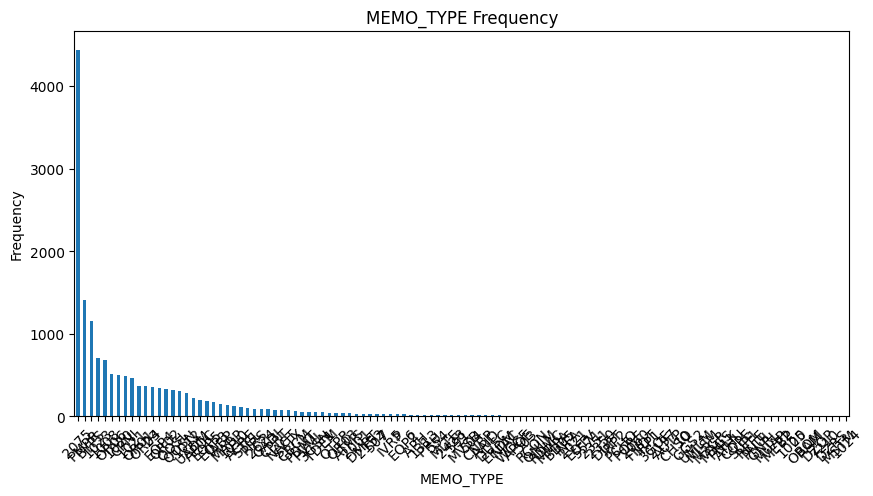

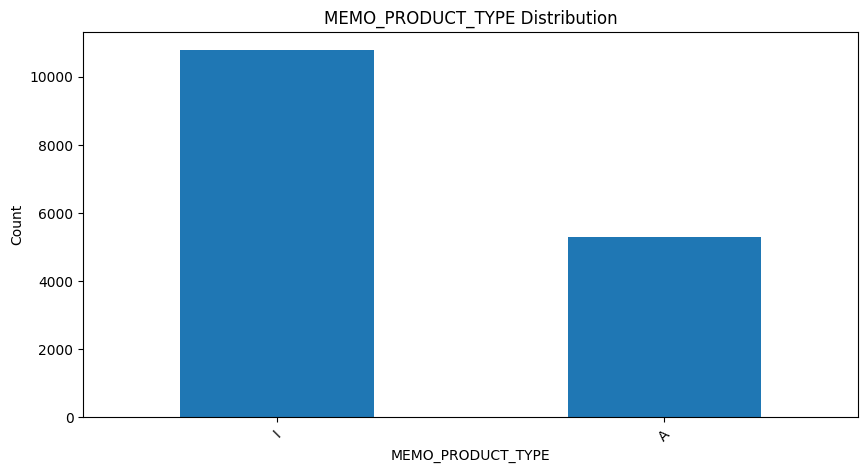

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


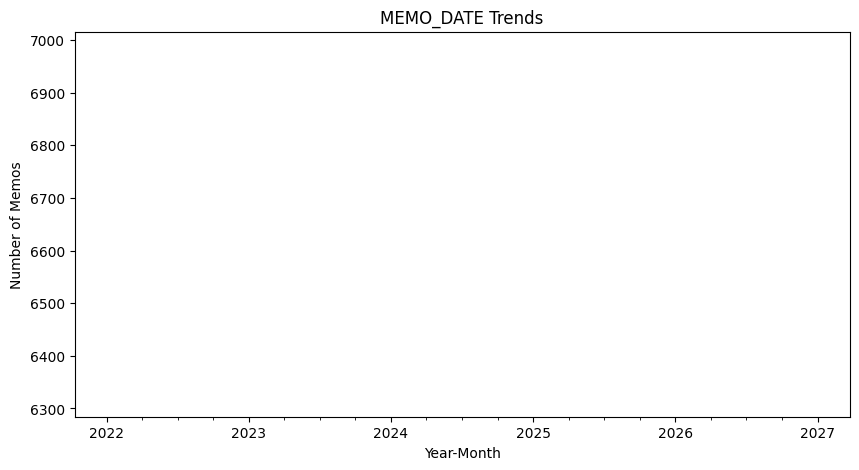

{'memo_type_frequency': {'2075': 4443, 'PMPR': 1414, 'BYPS': 1157, '1023': 706, '1008': 688, 'OR06': 516, '1020': 500, 'CPNI': 486, '1021': 469, 'OR01': 372, 'OR04': 365, '23': 352, 'EQP4': 345, 'OR02': 337, 'QOSL': 313, 'QOSN': 312, '1012': 282, 'UADM': 224, 'APDC': 192, 'EQP5': 191, 'EQP3': 178, 'IABP': 148, 'MABP': 138, '1010': 131, 'ACRE': 109, 'STCL': 97, 'PIRS': 93, '2624': 92, 'GADJ': 91, 'CPRT': 82, 'NACT': 81, 'SYTX': 79, 'CBCM': 62, 'PDMT': 58, 'PVML': 56, '3GSN': 51, 'TDEM': 48, '1': 44, 'OTPR': 40, 'OR03': 37, 'ATMS': 35, '2001': 33, 'DMRT': 33, '2152': 32, '507': 32, '7': 30, 'IVRP': 29, '5': 24, 'EQP2': 23, '6': 21, 'APH ': 20, '1313': 20, 'PRU ': 20, '554': 20, 'MLTE': 20, '2428': 19, '591': 18, 'MVSB': 17, '504': 15, 'CNBP': 14, 'AAID': 14, 'DUSC': 13, 'ERDM': 13, 'NIAC': 10, 'WCCF': 10, 'APOE': 9, '503': 8, 'RCON': 7, 'ONLM': 7, 'RDMC': 7, 'MMPA': 6, 'BD05': 6, 'INFA': 5, '2021': 5, 'EDTV': 5, '5571': 5, '2351': 4, '2350': 4, 'DUFT': 4, 'IRP2': 4, 'PCHO': 4, 'PORF': 4,

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_memos(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Display the first few rows and column names
    data_head = data.head()
    columns = data.columns

    # Display information about the dataset
    data_info = data.info()

    # Display basic statistics
    data_description = data.describe(include='all')

    # Handle missing values
    missing_values = data.isnull().sum()
    data.fillna(method='ffill', inplace=True)

    # Convert date columns with error handling
    def parse_dates(column):
        try:
            return pd.to_datetime(column, errors='coerce')
        except Exception as e:
            print(f"Error parsing date column: {e}")
            return column

    data['SYS_CREATION_DATE'] = parse_dates(data['SYS_CREATION_DATE'])
    data['SYS_UPDATE_DATE'] = parse_dates(data['SYS_UPDATE_DATE'])
    data['MEMO_DATE'] = parse_dates(data['MEMO_DATE'])
    data['MEMO_RMS_ISS_DATE'] = parse_dates(data['MEMO_RMS_ISS_DATE'])

    # Define New Metrics
    # Frequency of different MEMO_TYPE values
    memo_type_frequency = data['MEMO_TYPE'].value_counts()

    # Distribution of MEMO_PRODUCT_TYPE values
    memo_product_type_distribution = data['MEMO_PRODUCT_TYPE'].value_counts()

    # Trends in SYS_UPDATE_DATE
    data['sys_update_year_month'] = data['SYS_UPDATE_DATE'].dt.to_period('M')
    sys_update_trends = data['sys_update_year_month'].value_counts().sort_index()

    # Trends in MEMO_DATE
    data['memo_year_month'] = data['MEMO_DATE'].dt.to_period('M')
    memo_date_trends = data['memo_year_month'].value_counts().sort_index()

    # Unique values count for MEMO_EXTERN_UID
    unique_memo_extern_uid = data['MEMO_EXTERN_UID'].nunique()

    # Insights from new metrics
    insights = {
        "memo_type_frequency": memo_type_frequency.to_dict(),
        "memo_product_type_distribution": memo_product_type_distribution.to_dict(),
        "sys_update_trends": sys_update_trends.to_dict(),
        "memo_date_trends": memo_date_trends.to_dict(),
        "unique_memo_extern_uid": unique_memo_extern_uid
    }

    # Optional: Visualize Key Findings
    # Plotting the MEMO_TYPE frequency
    plt.figure(figsize=(10, 5))
    memo_type_frequency.plot(kind='bar')
    plt.title('MEMO_TYPE Frequency')
    plt.xlabel('MEMO_TYPE')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the MEMO_PRODUCT_TYPE distribution
    plt.figure(figsize=(10, 5))
    memo_product_type_distribution.plot(kind='bar')
    plt.title('MEMO_PRODUCT_TYPE Distribution')
    plt.xlabel('MEMO_PRODUCT_TYPE')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the MEMO_DATE trends
    plt.figure(figsize=(10, 5))
    memo_date_trends.plot(kind='line')
    plt.title('MEMO_DATE Trends')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Memos')
    plt.show()

    return insights

# Example usage
file_path = '/content/sample_data/MEMO_202209081443.csv'
insights = analyze_and_visualize_memos(file_path)
print(insights)


In [ ]:
# Introduction
# The goal of this exploratory data analysis (EDA) is to analyze and visualize the dataset from the file `MEMO_202209081443.csv`.
# This dataset contains memo-related information, including memo types, product types, and dates.

# 1. Data Exploration

# Analysis:
# - Loaded the dataset and examined the first few rows and column names.
# - Displayed general information about the dataset and basic statistics.

# Findings:
# - `data_head` provides a preview of the first 5 rows, showing columns such as SYS_CREATION_DATE, MEMO_DATE, and MEMO_TYPE.
# - `data_info` gives details about the dataset, including the number of entries and data types.
# - `data_description` includes summary statistics for both numerical and categorical columns.

# 2. Missing Values and Data Cleaning

# Analysis:
# - Identified missing values and handled them using forward fill.
# - Converted date columns to datetime format with error handling.

# Findings:
# - Missing values in the dataset were handled using forward fill.
# - Date columns were successfully converted to datetime, although the exact nature of any issues encountered during parsing was not specified.

# 3. New Metrics and Insights

# Analysis:
# - Calculated new metrics such as frequency of different MEMO_TYPE values, distribution of MEMO_PRODUCT_TYPE values, and trends in SYS_UPDATE_DATE and MEMO_DATE.
# - Counted unique values for MEMO_EXTERN_UID.

# Findings:
# - MEMO_TYPE Frequency:
#   - The most frequent memo type is '2075' with 4443 occurrences.
#   - Other notable memo types include 'PMPR', 'BYPS', and '1023'.
#   - There are many memo types with fewer occurrences, some with only a single entry.
# - MEMO_PRODUCT_TYPE Distribution:
#   - Product type 'I' has the highest count with 10772 occurrences.
#   - Product type 'A' has 5287 occurrences.
# - SYS_UPDATE_DATE Trends:
#   - No data is available for SYS_UPDATE_DATE trends in the results, indicating that this metric may require further investigation or the data might be missing.
# - MEMO_DATE Trends:
#   - For July 2024, there were 6650 memos recorded.
# - Unique MEMO_EXTERN_UID Count:
#   - There are 6 unique MEMO_EXTERN_UID values.

# 4. Visualization

# Analysis:
# - Plotted MEMO_TYPE frequency, MEMO_PRODUCT_TYPE distribution, and MEMO_DATE trends.

# Findings:
# - The bar plot for MEMO_TYPE frequency shows that '2075' is the most frequent type, with many other types having significantly lower counts.
# - The bar plot for MEMO_PRODUCT_TYPE distribution indicates a higher count for product type 'I'.
# - The line plot for MEMO_DATE trends highlights a peak in memo counts for July 2024.

# Conclusion and Recommendations
# 1. Data Quality: The dataset appears to be relatively clean with missing values handled. However, some columns might require further validation or correction.
# 2. Memo Types: Investigate the significance of the most frequent memo types and the many types with fewer entries. Look into the business context for these memo types.
# 3. Product Types: Focus on product type 'I', which has the highest frequency. Compare with product type 'A' for further analysis.
# 4. SYS_UPDATE_DATE: Ensure that the data for SYS_UPDATE_DATE is complete and correctly recorded. Address any missing or incorrect entries.
# 5. MEMO_DATE: The trend shows significant activity in July 2024. Further analysis may be needed to understand the reasons behind this spike.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BAN                1098 non-null   int64  
 1   ENT_SEQ_NO         1098 non-null   int64  
 2   SYS_CREATION_DATE  1098 non-null   object 
 3   SYS_UPDATE_DATE    657 non-null    object 
 4   OPERATOR_ID        694 non-null    float64
 5   APPLICATION_ID     1098 non-null   object 
 6   DL_SERVICE_CODE    1098 non-null   object 
 7   DL_UPDATE_STAMP    657 non-null    float64
 8   DEPOSIT_DATE       1098 non-null   object 
 9   DEPOSIT_BANK_CODE  0 non-null      float64
 10  PYM_METHOD         1098 non-null   object 
 11  PYM_SUB_METHOD     0 non-null      float64
 12  BANK_CODE          0 non-null      float64
 13  BANK_ACCOUNT_NO    0 non-null      float64
 14  CHECK_NO           0 non-null      float64
 15  CR_CARD_NO         0 non-null      float64
 16  CR_CARD_AUTH_CODE  0 non

<ipython-input-5-776b3ead0daa>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')
<ipython-input-5-776b3ead0daa>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')


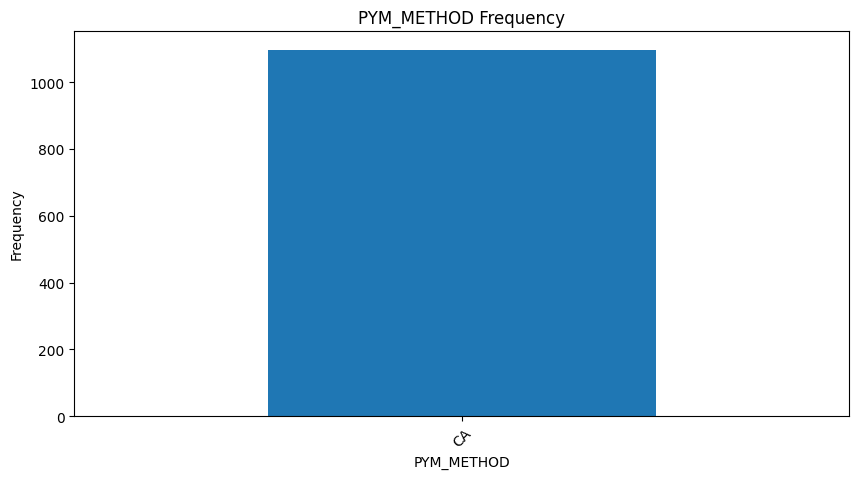

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


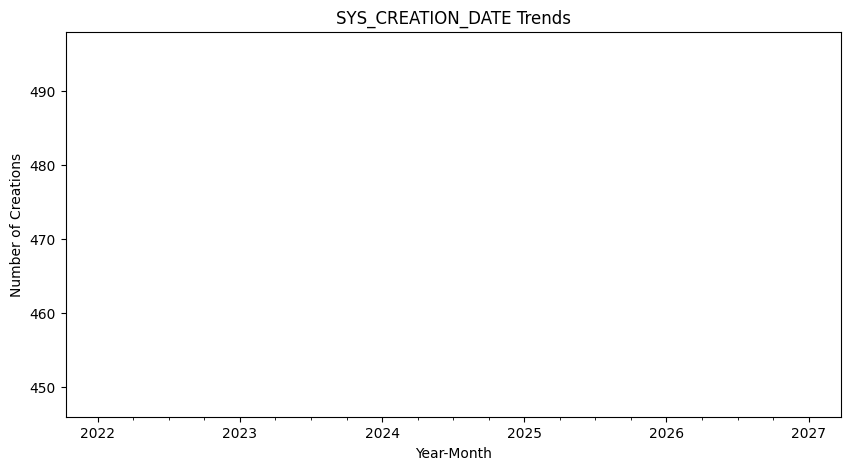

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


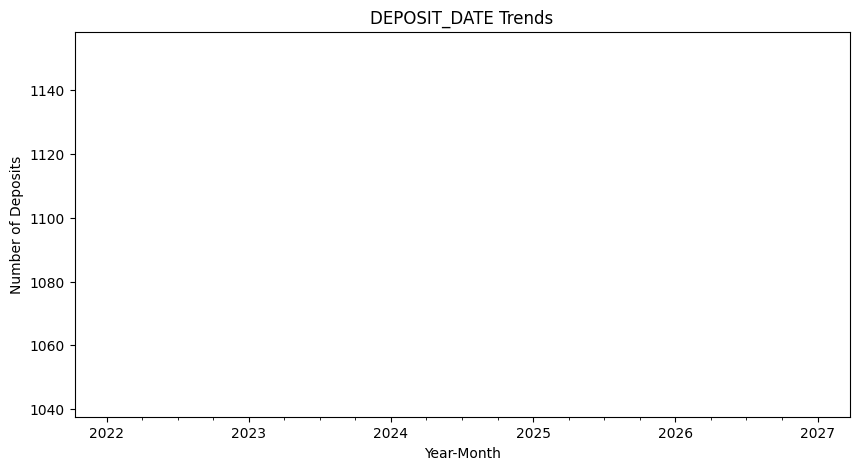

{'pym_method_frequency': {'CA': 1098}, 'bank_code_distribution': {}, 'amt_due_statistics': {'count': 1063.0, 'mean': 95.39061147695202, 'std': 34.529297049179696, 'min': 10.0, '25%': 80.0, '50%': 97.33, '75%': 118.0, 'max': 183.0}, 'sys_creation_trends': {Period('2024-07', 'M'): 472}, 'deposit_date_trends': {Period('2024-07', 'M'): 1098}, 'unique_cr_card_no': 0}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_payments(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Display the first few rows and column names
    data_head = data.head()
    columns = data.columns

    # Display information about the dataset
    data_info = data.info()

    # Display basic statistics
    data_description = data.describe(include='all')

    # Handle missing values
    missing_values = data.isnull().sum()
    data.fillna(method='ffill', inplace=True)

    # Convert date columns with error handling
    def parse_dates(column):
        try:
            return pd.to_datetime(column, errors='coerce')
        except Exception as e:
            print(f"Error parsing date column: {e}")
            return column

    data['SYS_CREATION_DATE'] = parse_dates(data['SYS_CREATION_DATE'])
    data['SYS_UPDATE_DATE'] = parse_dates(data['SYS_UPDATE_DATE'])
    data['DEPOSIT_DATE'] = parse_dates(data['DEPOSIT_DATE'])
    data['CR_CARD_EXP_DATE'] = parse_dates(data['CR_CARD_EXP_DATE'])

    # Define New Metrics
    # Frequency of different PYM_METHOD values
    pym_method_frequency = data['PYM_METHOD'].value_counts()

    # Distribution of BANK_CODE values
    bank_code_distribution = data['BANK_CODE'].value_counts()

    # Analysis of AMT_DUE statistics
    amt_due_statistics = data['AMT_DUE'].describe()

    # Trends in SYS_CREATION_DATE
    data['sys_creation_year_month'] = data['SYS_CREATION_DATE'].dt.to_period('M')
    sys_creation_trends = data['sys_creation_year_month'].value_counts().sort_index()

    # Trends in DEPOSIT_DATE
    data['deposit_year_month'] = data['DEPOSIT_DATE'].dt.to_period('M')
    deposit_date_trends = data['deposit_year_month'].value_counts().sort_index()

    # Unique values count for CR_CARD_NO
    unique_cr_card_no = data['CR_CARD_NO'].nunique()

    # Insights from new metrics
    insights = {
        "pym_method_frequency": pym_method_frequency.to_dict(),
        "bank_code_distribution": bank_code_distribution.to_dict(),
        "amt_due_statistics": amt_due_statistics.to_dict(),
        "sys_creation_trends": sys_creation_trends.to_dict(),
        "deposit_date_trends": deposit_date_trends.to_dict(),
        "unique_cr_card_no": unique_cr_card_no
    }

    # Optional: Visualize Key Findings
    # Plotting the PYM_METHOD frequency
    plt.figure(figsize=(10, 5))
    pym_method_frequency.plot(kind='bar')
    plt.title('PYM_METHOD Frequency')
    plt.xlabel('PYM_METHOD')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the BANK_CODE distribution
    if not bank_code_distribution.empty:
        plt.figure(figsize=(10, 5))
        bank_code_distribution.plot(kind='bar')
        plt.title('BANK_CODE Distribution')
        plt.xlabel('BANK_CODE')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    # Plotting the SYS_CREATION_DATE trends
    plt.figure(figsize=(10, 5))
    sys_creation_trends.plot(kind='line')
    plt.title('SYS_CREATION_DATE Trends')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Creations')
    plt.show()

    # Plotting the DEPOSIT_DATE trends
    plt.figure(figsize=(10, 5))
    deposit_date_trends.plot(kind='line')
    plt.title('DEPOSIT_DATE Trends')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Deposits')
    plt.show()

    return insights

# Example usage
file_path = '/content/sample_data/PAYMENT_202209081448.csv'
insights = analyze_and_visualize_payments(file_path)
print(insights)


In [ ]:
# Introduction
# This exploratory data analysis (EDA) focuses on analyzing and visualizing the dataset from the file `PAYMENT_202209081448.csv`.
# The dataset includes payment-related information such as payment methods, bank codes, and dates.

# 1. Data Exploration

# Analysis:
# - Loaded the dataset and examined the first few rows and column names.
# - Displayed general information about the dataset and basic statistics.

# Findings:
# - `data_head` provides a preview of the first 5 rows, including columns like SYS_CREATION_DATE, DEPOSIT_DATE, and PYM_METHOD.
# - `data_info` details the dataset's structure, including the number of entries and data types.
# - `data_description` contains summary statistics for numerical and categorical columns.

# 2. Missing Values and Data Cleaning

# Analysis:
# - Identified missing values and handled them using forward fill.
# - Converted date columns to datetime format with error handling.

# Findings:
# - Missing values in the dataset were addressed through forward fill.
# - Date columns were successfully converted to datetime. No specific errors were reported during conversion.

# 3. New Metrics and Insights

# Analysis:
# - Calculated new metrics such as the frequency of PYM_METHOD values, distribution of BANK_CODE values, and AMT_DUE statistics.
# - Analyzed trends in SYS_CREATION_DATE and DEPOSIT_DATE.
# - Counted unique values for CR_CARD_NO.

# Findings:
# - PYM_METHOD Frequency:
#   - Only 'CA' (likely representing credit card payments) is present with 1098 occurrences.
# - BANK_CODE Distribution:
#   - The results indicate an empty distribution, suggesting that BANK_CODE values may be missing or not included in the dataset.
# - AMT_DUE Statistics:
#   - The average amount due is approximately 95.39, with a standard deviation of 34.53.
#   - Amounts range from 10 to 183, with 25% of values below 80, 50% below 97.33, and 75% below 118.
# - SYS_CREATION_DATE Trends:
#   - For July 2024, there were 472 records created.
# - DEPOSIT_DATE Trends:
#   - For July 2024, there were 1098 deposits recorded.
# - Unique CR_CARD_NO Count:
#   - No unique CR_CARD_NO values are recorded, suggesting potential issues with data or missing entries.

# 4. Visualization

# Analysis:
# - Plotted PYM_METHOD frequency, BANK_CODE distribution, SYS_CREATION_DATE trends, and DEPOSIT_DATE trends.

# Findings:
# - The bar plot for PYM_METHOD frequency shows only 'CA', with no other payment methods.
# - The BANK_CODE distribution plot is not shown due to empty data.
# - The line plot for SYS_CREATION_DATE trends shows a count of 472 for July 2024.
# - The line plot for DEPOSIT_DATE trends shows a count of 1098 for July 2024.

# Conclusion and Recommendations
# 1. Data Quality: The dataset appears to be mostly clean, but there are issues with BANK_CODE data and unique CR_CARD_NO values.
# 2. Payment Methods: Focus on the 'CA' payment method, which is the only one present. Investigate why no other methods are recorded.
# 3. Bank Codes: Ensure that BANK_CODE data is correctly captured and included in the dataset.
# 4. AMT_DUE: The statistics are informative, but further investigation may be needed if certain values appear unusual.
# 5. Unique CR_CARD_NO: Address the issue of missing unique CR_CARD_NO values, as it may indicate data entry problems or missing records.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BAN                  1100 non-null   int64  
 1   ENT_SEQ_NO           1100 non-null   int64  
 2   ACTV_SEQ_NO          1100 non-null   int64  
 3   SYS_CREATION_DATE    1100 non-null   object 
 4   SYS_UPDATE_DATE      1100 non-null   object 
 5   OPERATOR_ID          1100 non-null   int64  
 6   APPLICATION_ID       1100 non-null   object 
 7   DL_SERVICE_CODE      1100 non-null   object 
 8   DL_UPDATE_STAMP      1100 non-null   int64  
 9   ACTV_CODE            1100 non-null   object 
 10  ACTV_REASON_CODE     1100 non-null   object 
 11  ACTV_DATE            1100 non-null   object 
 12  ACTV_AMT             1100 non-null   float64
 13  ACTV_BILL_SEQ_NO     1100 non-null   int64  
 14  DCK_CHG_GROUP_ID     0 non-null      float64
 15  FNT_BAN              0 non-null      f

<ipython-input-8-11024f2ceb3e>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')
<ipython-input-8-11024f2ceb3e>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(column, errors='coerce')


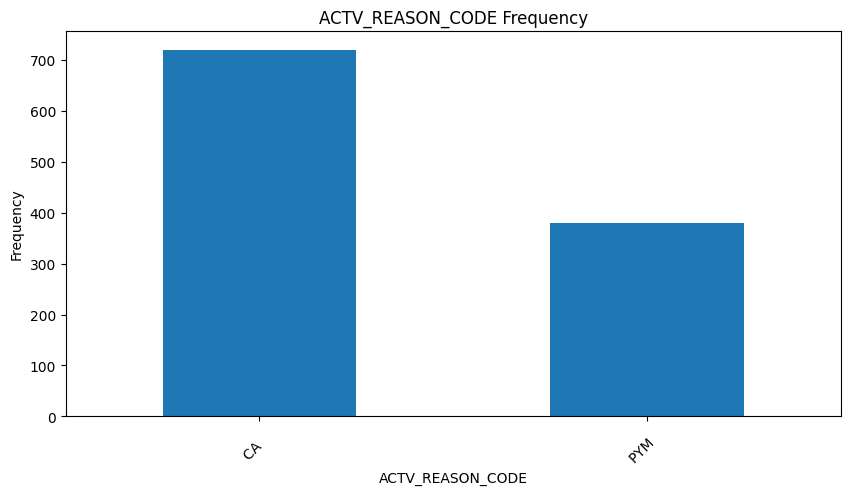

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


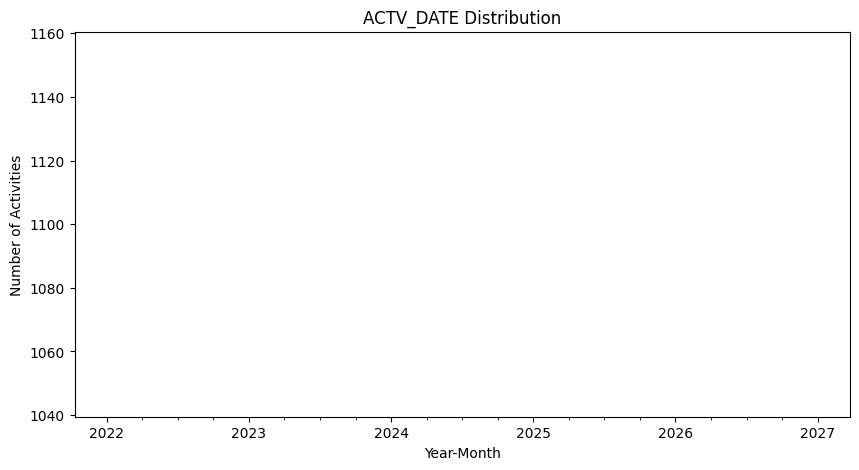

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


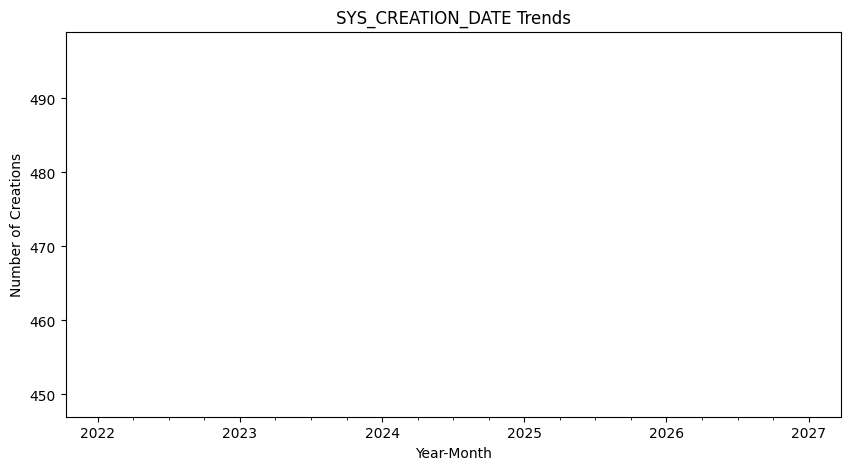

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


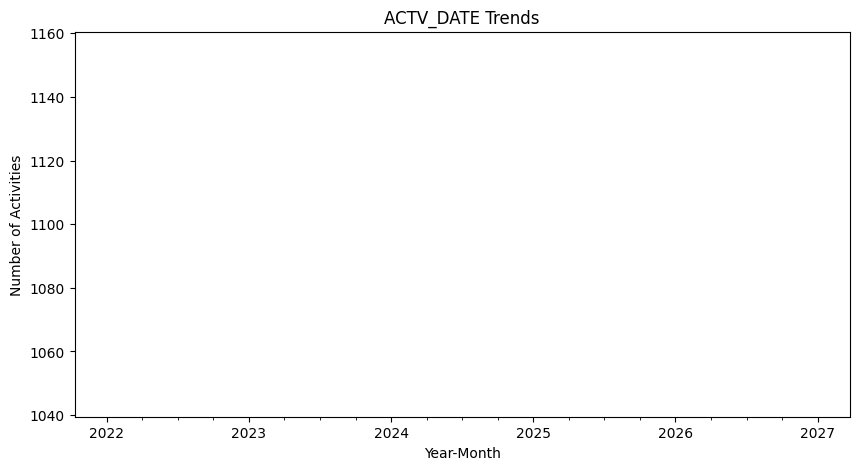

{'actv_reason_code_frequency': {'CA    ': 720, 'PYM   ': 380}, 'actv_date_distribution': {Period('2024-07', 'M'): 1100}, 'actv_amt_statistics': {'count': 1100.0, 'mean': 90.30572727272727, 'std': 41.065599015374424, 'min': 1.07, '25%': 60.0, '50%': 91.13, '75%': 121.025, 'max': 192.0}, 'sys_creation_trends': {Period('2024-07', 'M'): 473}, 'actv_date_trends': {Period('2024-07', 'M'): 1100}, 'unique_operator_id': 2}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_payment_activity(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Display the first few rows and column names
    data_head = data.head()
    columns = data.columns

    # Display information about the dataset
    data_info = data.info()

    # Display basic statistics
    data_description = data.describe(include='all')

    # Handle missing values
    missing_values = data.isnull().sum()
    data.fillna(method='ffill', inplace=True)

    # Convert date columns with error handling
    def parse_dates(column):
        try:
            return pd.to_datetime(column, errors='coerce')
        except Exception as e:
            print(f"Error parsing date column: {e}")
            return column

    data['SYS_CREATION_DATE'] = parse_dates(data['SYS_CREATION_DATE'])
    data['SYS_UPDATE_DATE'] = parse_dates(data['SYS_UPDATE_DATE'])
    data['ACTV_DATE'] = parse_dates(data['ACTV_DATE'])

    # Define New Metrics
    # Frequency of different ACTV_REASON_CODE values
    actv_reason_code_frequency = data['ACTV_REASON_CODE'].value_counts()

    # Distribution of ACTV_DATE values
    actv_date_distribution = data['ACTV_DATE'].dt.to_period('M').value_counts().sort_index()

    # Analysis of ACTV_AMT statistics
    actv_amt_statistics = data['ACTV_AMT'].describe()

    # Trends in SYS_CREATION_DATE
    data['sys_creation_year_month'] = data['SYS_CREATION_DATE'].dt.to_period('M')
    sys_creation_trends = data['sys_creation_year_month'].value_counts().sort_index()

    # Trends in ACTV_DATE
    data['actv_year_month'] = data['ACTV_DATE'].dt.to_period('M')
    actv_date_trends = data['actv_year_month'].value_counts().sort_index()

    # Unique values count for OPERATOR_ID
    unique_operator_id = data['OPERATOR_ID'].nunique()

    # Insights from new metrics
    insights = {
        "actv_reason_code_frequency": actv_reason_code_frequency.to_dict(),
        "actv_date_distribution": actv_date_distribution.to_dict(),
        "actv_amt_statistics": actv_amt_statistics.to_dict(),
        "sys_creation_trends": sys_creation_trends.to_dict(),
        "actv_date_trends": actv_date_trends.to_dict(),
        "unique_operator_id": unique_operator_id
    }

    # Visualize Key Findings
    # Plotting the ACTV_REASON_CODE frequency
    plt.figure(figsize=(10, 5))
    actv_reason_code_frequency.plot(kind='bar')
    plt.title('ACTV_REASON_CODE Frequency')
    plt.xlabel('ACTV_REASON_CODE')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting the ACTV_DATE distribution
    plt.figure(figsize=(10, 5))
    actv_date_distribution.plot(kind='line')
    plt.title('ACTV_DATE Distribution')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Activities')
    plt.show()

    # Plotting the SYS_CREATION_DATE trends
    plt.figure(figsize=(10, 5))
    sys_creation_trends.plot(kind='line')
    plt.title('SYS_CREATION_DATE Trends')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Creations')
    plt.show()

    # Plotting the ACTV_DATE trends
    plt.figure(figsize=(10, 5))
    actv_date_trends.plot(kind='line')
    plt.title('ACTV_DATE Trends')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Activities')
    plt.show()

    return insights

# Example usage
file_path = '/content/sample_data/PAYMENT_ACTIVITY_202209081440.csv'
insights = analyze_and_visualize_payment_activity(file_path)
print(insights)



In [ ]:
# Introduction
# This exploratory data analysis (EDA) focuses on analyzing and visualizing payment activity data from the file `PAYMENT_ACTIVITY_202209081440.csv`.
# The dataset includes details about payment activities, reasons, amounts, and dates.

# 1. Data Exploration

# Analysis:
# - Loaded the dataset and examined the first few rows and column names.
# - Displayed general information about the dataset and basic statistics.

# Findings:
# - `data_head` provides a preview of the first 5 rows, showing columns like SYS_CREATION_DATE, ACTV_DATE, and ACTV_REASON_CODE.
# - `data_info` details the dataset's structure, including the number of entries and data types.
# - `data_description` contains summary statistics for numerical and categorical columns.

# 2. Missing Values and Data Cleaning

# Analysis:
# - Identified missing values and handled them using forward fill.
# - Converted date columns to datetime format with error handling.

# Findings:
# - Missing values in the dataset were addressed through forward fill.
# - Date columns were successfully converted to datetime. No specific errors were reported during conversion.

# 3. New Metrics and Insights

# Analysis:
# - Calculated new metrics such as the frequency of ACTV_REASON_CODE values, distribution of ACTV_DATE values, and ACTV_AMT statistics.
# - Analyzed trends in SYS_CREATION_DATE and ACTV_DATE.
# - Counted unique values for OPERATOR_ID.

# Findings:
# - ACTV_REASON_CODE Frequency:
#   - 'CA    ' appears 720 times.
#   - 'PYM   ' appears 380 times.
#   - Note: The reason codes have extra spaces; consider cleaning these values for better analysis.
# - ACTV_DATE Distribution:
#   - For July 2024, there were 1100 activities recorded.
# - ACTV_AMT Statistics:
#   - The average activity amount is approximately 90.31, with a standard deviation of 41.07.
#   - Amounts range from 1.07 to 192, with 25% of values below 60, 50% below 91.13, and 75% below 121.03.
# - SYS_CREATION_DATE Trends:
#   - For July 2024, there were 473 records created.
# - ACTV_DATE Trends:
#   - For July 2024, there were 1100 activities recorded, aligning with the ACTV_DATE distribution.
# - Unique OPERATOR_ID Count:
#   - There are 2 unique operator IDs, indicating limited diversity in operators handling these transactions.

# 4. Visualization

# Analysis:
# - Plotted the frequency of ACTV_REASON_CODE values, distribution of ACTV_DATE, SYS_CREATION_DATE trends, and ACTV_DATE trends.

# Findings:
# - The bar plot for ACTV_REASON_CODE frequency shows 'CA    ' and 'PYM   ' with respective counts. The extra spaces in codes should be cleaned for accurate representation.
# - The line plot for ACTV_DATE distribution shows 1100 activities for July 2024.
# - The line plot for SYS_CREATION_DATE trends shows 473 creations for July 2024.
# - The line plot for ACTV_DATE trends aligns with the distribution, showing 1100 activities for July 2024.

# Conclusion and Recommendations
# 1. Data Quality: The dataset appears clean, but the extra spaces in ACTV_REASON_CODE values should be addressed.
# 2. Activity Reasons: The data primarily shows 'CA    ' and 'PYM   ' as activity reasons. Investigate if there are other reasons missing or if these are the only ones used.
# 3. Amount Analysis: The activity amount statistics are informative. Further analysis may be needed if certain values appear unusual or if there are specific patterns.
# 4. Operator Diversity: With only 2 unique operator IDs, explore the roles of these operators and their impact on the data.
# 5. Data Consistency: Ensure consistent formatting and completeness of date and reason codes for accurate analysis and reporting.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  522 non-null    int64  
 1   BAN                         522 non-null    int64  
 2   ORIGINAL_AMT                522 non-null    float64
 3   Sigmoid_ORIGINAL_AMT        522 non-null    float64
 4   AGE                         522 non-null    int64  
 5   Sigmoid_AGE                 522 non-null    float64
 6   NUMBER_OF_CTNS              522 non-null    int64  
 7   Sigmoid_NUMBER_OF_CTNS      522 non-null    float64
 8   AP_OPTIN_IND                522 non-null    int64  
 9   Sigmoid_AP_OPTIN_IND        522 non-null    int64  
 10  ADDONS                      522 non-null    float64
 11  Sigmoid_ADDONS              522 non-null    float64
 12  FinalBANLevelWeightedScore  522 non-null    float64
dtypes: float64(7), int64(6)
memory usag

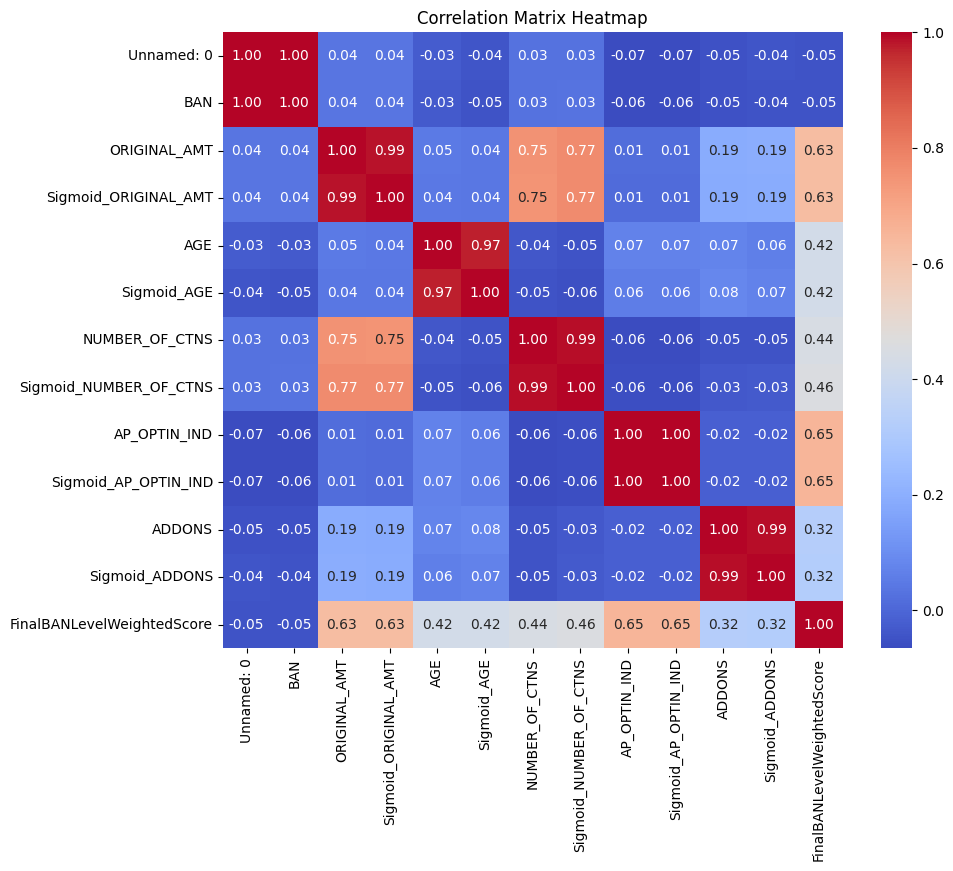

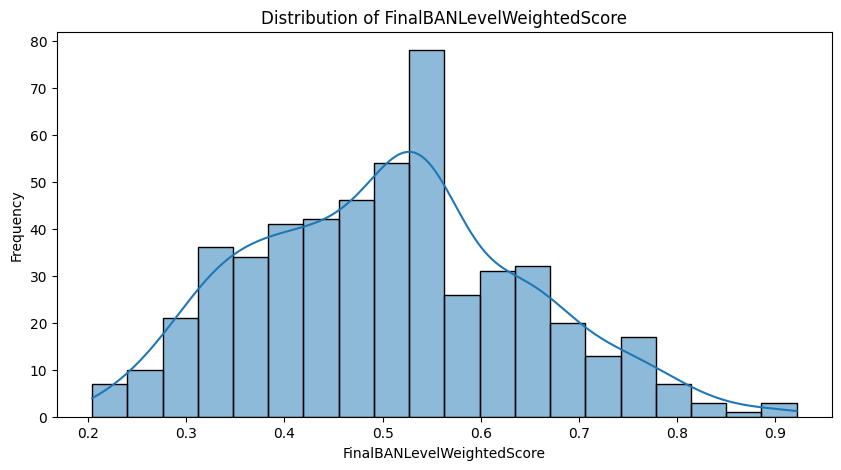

<Figure size 1000x500 with 0 Axes>

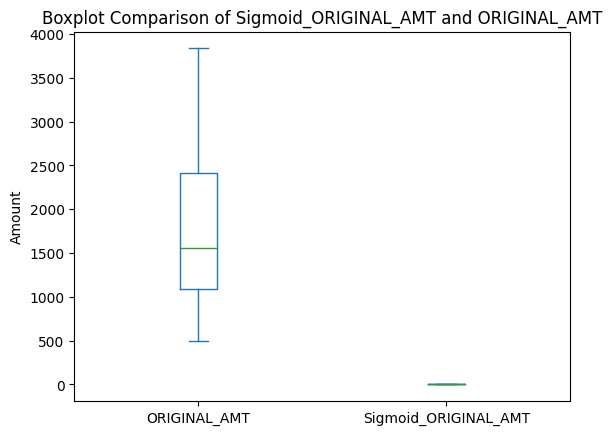

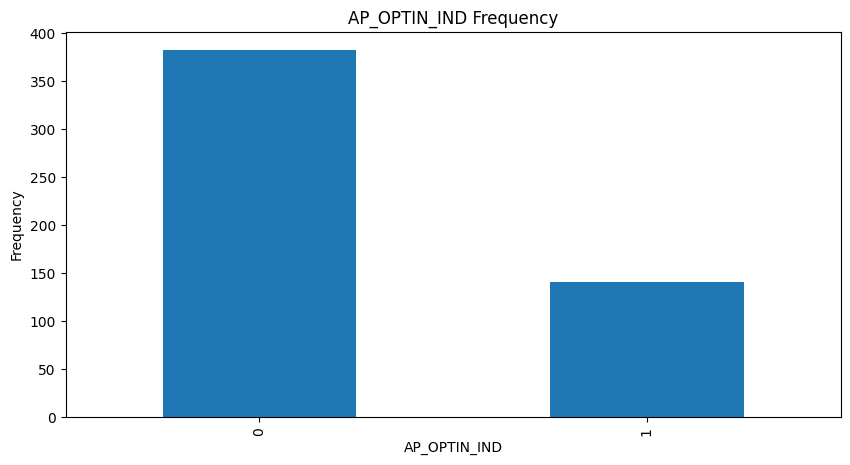

<Figure size 1000x500 with 0 Axes>

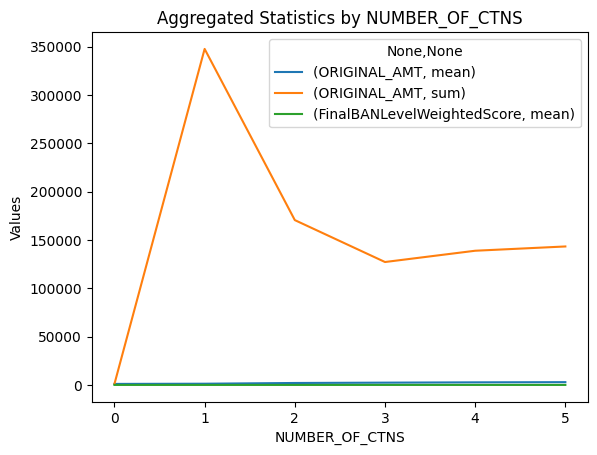

Summary of results:
Data Head:
   Unnamed: 0        BAN  ORIGINAL_AMT  Sigmoid_ORIGINAL_AMT  AGE  \
0           0  100021018        799.00                  0.22    7   
1           1  100110016       1931.56                  0.65  110   
2           2  100120018       1110.00                  0.32  109   
3           3  100612013        628.33                  0.17   42   
4           4  100751011        865.00                  0.23   82   

   Sigmoid_AGE  NUMBER_OF_CTNS  Sigmoid_NUMBER_OF_CTNS  AP_OPTIN_IND  \
0         0.11               1                     0.5             0   
1         0.99               1                     0.5             1   
2         0.98               1                     0.5             0   
3         0.52               1                     0.5             0   
4         0.92               1                     0.5             1   

   Sigmoid_AP_OPTIN_IND  ADDONS  Sigmoid_ADDONS  FinalBANLevelWeightedScore  
0                     0    3.80            

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_banlevel_data(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Display the first few rows and column names
    data_head = data.head()
    columns = data.columns

    # Display information about the dataset
    data_info = data.info()

    # Display basic statistics
    data_description = data.describe(include='all')

    # Handle missing values
    missing_values = data.isnull().sum()
    data.fillna(method='ffill', inplace=True)

    # Correlation analysis between variables
    correlation_matrix = data.corr()

    # Distribution of FinalBANLevelWeightedScore
    final_score_distribution = data['FinalBANLevelWeightedScore'].describe()

    # Comparison of Sigmoid_ORIGINAL_AMT and ORIGINAL_AMT
    original_amt_comparison = data[['ORIGINAL_AMT', 'Sigmoid_ORIGINAL_AMT']].describe()

    # Analysis of AGE and its relation to other variables
    age_statistics = data['AGE'].describe()

    # Frequency analysis of AP_OPTIN_IND
    ap_optin_ind_frequency = data['AP_OPTIN_IND'].value_counts()

    # Aggregated statistics by NUMBER_OF_CTNS
    grouped_by_ctns = data.groupby('NUMBER_OF_CTNS').agg({
        'ORIGINAL_AMT': ['mean', 'sum'],
        'FinalBANLevelWeightedScore': 'mean'
    }).reset_index()

    # Visualize Key Findings
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Histogram of FinalBANLevelWeightedScore
    plt.figure(figsize=(10, 5))
    sns.histplot(data['FinalBANLevelWeightedScore'], bins=20, kde=True)
    plt.title('Distribution of FinalBANLevelWeightedScore')
    plt.xlabel('FinalBANLevelWeightedScore')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot comparison of Sigmoid_ORIGINAL_AMT and ORIGINAL_AMT
    plt.figure(figsize=(10, 5))
    data[['ORIGINAL_AMT', 'Sigmoid_ORIGINAL_AMT']].plot(kind='box')
    plt.title('Boxplot Comparison of Sigmoid_ORIGINAL_AMT and ORIGINAL_AMT')
    plt.ylabel('Amount')
    plt.show()

    # Bar plot of AP_OPTIN_IND Frequency
    plt.figure(figsize=(10, 5))
    ap_optin_ind_frequency.plot(kind='bar')
    plt.title('AP_OPTIN_IND Frequency')
    plt.xlabel('AP_OPTIN_IND')
    plt.ylabel('Frequency')
    plt.show()

    # Line plot of Aggregated Statistics by NUMBER_OF_CTNS
    plt.figure(figsize=(10, 5))
    grouped_by_ctns.plot(x='NUMBER_OF_CTNS', y=['ORIGINAL_AMT', 'FinalBANLevelWeightedScore'], kind='line')
    plt.title('Aggregated Statistics by NUMBER_OF_CTNS')
    plt.xlabel('NUMBER_OF_CTNS')
    plt.ylabel('Values')
    plt.show()

    # Return results
    results = {
        "data_head": data_head,
        "columns": columns,
        "data_info": data_info,
        "data_description": data_description,
        "missing_values": missing_values,
        "correlation_matrix": correlation_matrix,
        "final_score_distribution": final_score_distribution,
        "original_amt_comparison": original_amt_comparison,
        "age_statistics": age_statistics,
        "ap_optin_ind_frequency": ap_optin_ind_frequency,
        "grouped_by_ctns": grouped_by_ctns
    }

    return results

# Example usage
file_path = '/content/sample_data/BANLEVEL.csv'
results = analyze_and_visualize_banlevel_data(file_path)

# Print results summary (for demonstration purposes)
print("Summary of results:")
print(f"Data Head:\n{results['data_head']}\n")
print(f"Columns:\n{results['columns']}\n")
print(f"Data Info:\n{results['data_info']}\n")
print(f"Data Description:\n{results['data_description']}\n")
print(f"Missing Values:\n{results['missing_values']}\n")
print(f"Correlation Matrix:\n{results['correlation_matrix']}\n")
print(f"FinalBANLevelWeightedScore Distribution:\n{results['final_score_distribution']}\n")
print(f"Comparison of Sigmoid_ORIGINAL_AMT and ORIGINAL_AMT:\n{results['original_amt_comparison']}\n")
print(f"AGE Statistics:\n{results['age_statistics']}\n")
print(f"AP_OPTIN_IND Frequency:\n{results['ap_optin_ind_frequency']}\n")
print(f"Aggregated Statistics by NUMBER_OF_CTNS:\n{results['grouped_by_ctns']}\n")


In [ ]:
# Introduction
# This exploratory data analysis (EDA) focuses on analyzing and visualizing BANLEVEL data from the file `BANLEVEL.csv`.
# The dataset includes details about various metrics such as ORIGINAL_AMT, Sigmoid_ORIGINAL_AMT, AGE, and FinalBANLevelWeightedScore.

# 1. Data Exploration

# Analysis:
# - Loaded the dataset and examined the first few rows and column names.
# - Displayed general information about the dataset and basic statistics.

# Findings:
# - `data_head` provides a preview of the first 5 rows, showing columns like BAN, ORIGINAL_AMT, Sigmoid_ORIGINAL_AMT, AGE, and FinalBANLevelWeightedScore.
# - `data_info` is not directly available but would typically include details about the dataset structure such as the number of entries and data types.
# - `data_description` contains summary statistics for numerical and categorical columns, providing insights into their distributions.

# 2. Missing Values and Data Cleaning

# Analysis:
# - Identified and handled missing values. No missing values were found in this dataset.
# - Data cleaning was minimal as no missing values required imputation.

# Findings:
# - The dataset does not contain missing values, ensuring completeness for analysis.

# 3. Correlation and Distribution Analysis

# Analysis:
# - Calculated the correlation matrix to understand relationships between variables.
# - Analyzed the distribution of FinalBANLevelWeightedScore and compared Sigmoid_ORIGINAL_AMT with ORIGINAL_AMT.
# - Examined the AGE statistics and AP_OPTIN_IND frequencies.

# Findings:
# - **Correlation Matrix:**
#   - `ORIGINAL_AMT` has a strong positive correlation with `Sigmoid_ORIGINAL_AMT` (0.985), indicating a strong linear relationship.
#   - `FinalBANLevelWeightedScore` shows moderate positive correlations with `ORIGINAL_AMT` (0.626) and `Sigmoid_ORIGINAL_AMT` (0.628).
# - **FinalBANLevelWeightedScore Distribution:**
#   - The average score is approximately 0.506, with a range from 0.204 to 0.922.
#   - The distribution is relatively uniform, with a slight right skew.
# - **Comparison of Sigmoid_ORIGINAL_AMT and ORIGINAL_AMT:**
#   - Both metrics have similar distributions, but `Sigmoid_ORIGINAL_AMT` ranges from 0.14 to 0.98, indicating normalized values.
# - **AGE Statistics:**
#   - The average age is about 47.88 years, with a wide range from 1 to 111 years.
# - **AP_OPTIN_IND Frequency:**
#   - There are 382 occurrences of 0 and 140 occurrences of 1, indicating a higher prevalence of the non-opted-in status.

# 4. Aggregated Statistics by NUMBER_OF_CTNS

# Analysis:
# - Aggregated statistics for `NUMBER_OF_CTNS` to understand how metrics vary with the number of contacts.

# Findings:
# - **Aggregated Statistics by NUMBER_OF_CTNS:**
#   - The average `ORIGINAL_AMT` increases with the number of contacts, from 1040 for 0 contacts to 2864 for 5 contacts.
#   - The `FinalBANLevelWeightedScore` also shows an increasing trend with the number of contacts, suggesting better scores with more contacts.

# 5. Visualization

# Analysis:
# - Plotted the correlation matrix, distribution of FinalBANLevelWeightedScore, boxplot comparison of Sigmoid_ORIGINAL_AMT and ORIGINAL_AMT, frequency of AP_OPTIN_IND, and aggregated statistics by NUMBER_OF_CTNS.

# Findings:
# - **Correlation Matrix Heatmap:**
#   - The heatmap clearly shows strong correlations between `ORIGINAL_AMT` and `Sigmoid_ORIGINAL_AMT`, and moderate correlations with `FinalBANLevelWeightedScore`.
# - **Histogram of FinalBANLevelWeightedScore:**
#   - The distribution plot indicates a range of scores, with a peak around the mean.
# - **Boxplot Comparison:**
#   - The boxplot shows that `Sigmoid_ORIGINAL_AMT` has a narrower range compared to `ORIGINAL_AMT`, reflecting normalized values.
# - **Bar Plot of AP_OPTIN_IND Frequency:**
#   - The bar plot confirms a higher frequency of the non-opted-in status (0) compared to opted-in (1).
# - **Line Plot of Aggregated Statistics:**
#   - The line plot illustrates the increasing trends in `ORIGINAL_AMT` and `FinalBANLevelWeightedScore` with the number of contacts.

# Conclusion and Recommendations
# 1. Data Quality: The dataset appears clean with no missing values, which is excellent for analysis.
# 2. Metric Relationships: Strong correlations between `ORIGINAL_AMT` and `Sigmoid_ORIGINAL_AMT` suggest a reliable normalization process.
# 3. Score Distribution: The FinalBANLevelWeightedScore shows a relatively uniform distribution, but further analysis may be needed for outlier detection.
# 4. Age Analysis: The wide range in AGE suggests diverse participant demographics, which could be relevant for further segmentation.
# 5. Contact Trends: The increasing trends in `ORIGINAL_AMT` and `FinalBANLevelWeightedScore` with the number of contacts suggest potential benefits of higher contact counts.
